# ANALISE 004 - ANALISE DA BASE DO SEADE - COMPARATIVO MUNICIPIOS

Aqui faremos o tratamento prévio da base de casos e óbitos do SEADE, apenas para municípios do estado de São Paulo e acessado no dia 15/08/2021. Os resultados serão gravados no mesmo arquivo para visualização através da ferramenta Tableau.

Fonte dos dados: https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/dados_covid_sp.csv

A idéia aqui neste notebook é apenas fazer o tratamento de caracteres acentuados, padronizando para sem acentuação e em maiúsculas. Evitar rodar a carga inicial sem necessidade, que pode demorar.

In [2]:
#imports necessários
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline
import pandas as pd
from datetime import datetime  
from datetime import timedelta  

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

Esta planilha foi previamente tratada de forma manual, diretamente no excel, para exclusão de todos os caracteres acentuados e colunas que não serão utilizadas no tratamento. 

In [3]:
dados_covid_sp = pd.read_excel('dados_covid_sp_150821.xlsx')
dados_covid_sp

MUNICIPIO   datahora  casos  casos_novos  casos_pc  casos_mm7d  \
0       AGUAS DA PRATA 2020-02-25      0            0     0.000    0.000000   
1       AGUAS DA PRATA 2020-02-26      0            0     0.000    0.000000   
2       AGUAS DA PRATA 2020-02-27      0            0     0.000    0.000000   
3       AGUAS DA PRATA 2020-02-28      0            0     0.000    0.000000   
4       AGUAS DA PRATA 2020-02-29      0            0     0.000    0.000000   
...                ...        ...    ...          ...       ...         ...   
347543        ZACARIAS 2021-08-11    246            0  9609.375    0.000000   
347544        ZACARIAS 2021-08-12    246            0  9609.375    0.000000   
347545        ZACARIAS 2021-08-13    248            2  9687.500    0.285714   
347546        ZACARIAS 2021-08-14    248            0  9687.500    0.285714   
347547        ZACARIAS 2021-08-15    248            0  9687.500    0.285714   

        obitos  obitos_novos  obitos_pc  obitos_mm7d  letalidade   pop  \
0            0             0      0.000          0.0    0.000000  7797   
1            0             0      0.000          0.0    0.000000  7797   
2            0             0      0.000          0.0    0.000000  7797   
3            0             0      0.000          0.0    0.000000  7797   
4            0             0      0.000          0.0    0.000000  7797   
...        ...           ...        ...          ...         ...   ...   
347543      10             0    390.625          0.0    0.040650  2560   
347544      10             0    390.625          0.0    0.040650  2560   
347545      10             0    390.625          0.0    0.040323  2560   
347546      10             0    390.625          0.0    0.040323  2560   
347547      10             0    390.625          0.0    0.040323  2560   

        pop_60   area  latitude  longitude  
0         1729  14267  -21.9319   -46.7176  
1         1729  14267  -21.9319   -46.7176  
2         1729  14267  -21.9319   -46.7176  
3         1729  14267  -21.9319   -46.7176  
4         1729  14267  -21.9319   -46.7176  
...        ...    ...       ...        ...  
347543     481  31906  -21.0506   -50.0552  
347544     481  31906  -21.0506   -50.0552  
347545     481  31906  -21.0506   -50.0552  
347546     481  31906  -21.0506   -50.0552  
347547     481  31906  -21.0506   -50.0552  

[347548 rows x 16 columns]

Abaixo, as visualizações obtidas no Tableau a partir da base gravada. Inicialmente, algumas curvas de evolução comparada de casos, para cidades de portes semelhantes.

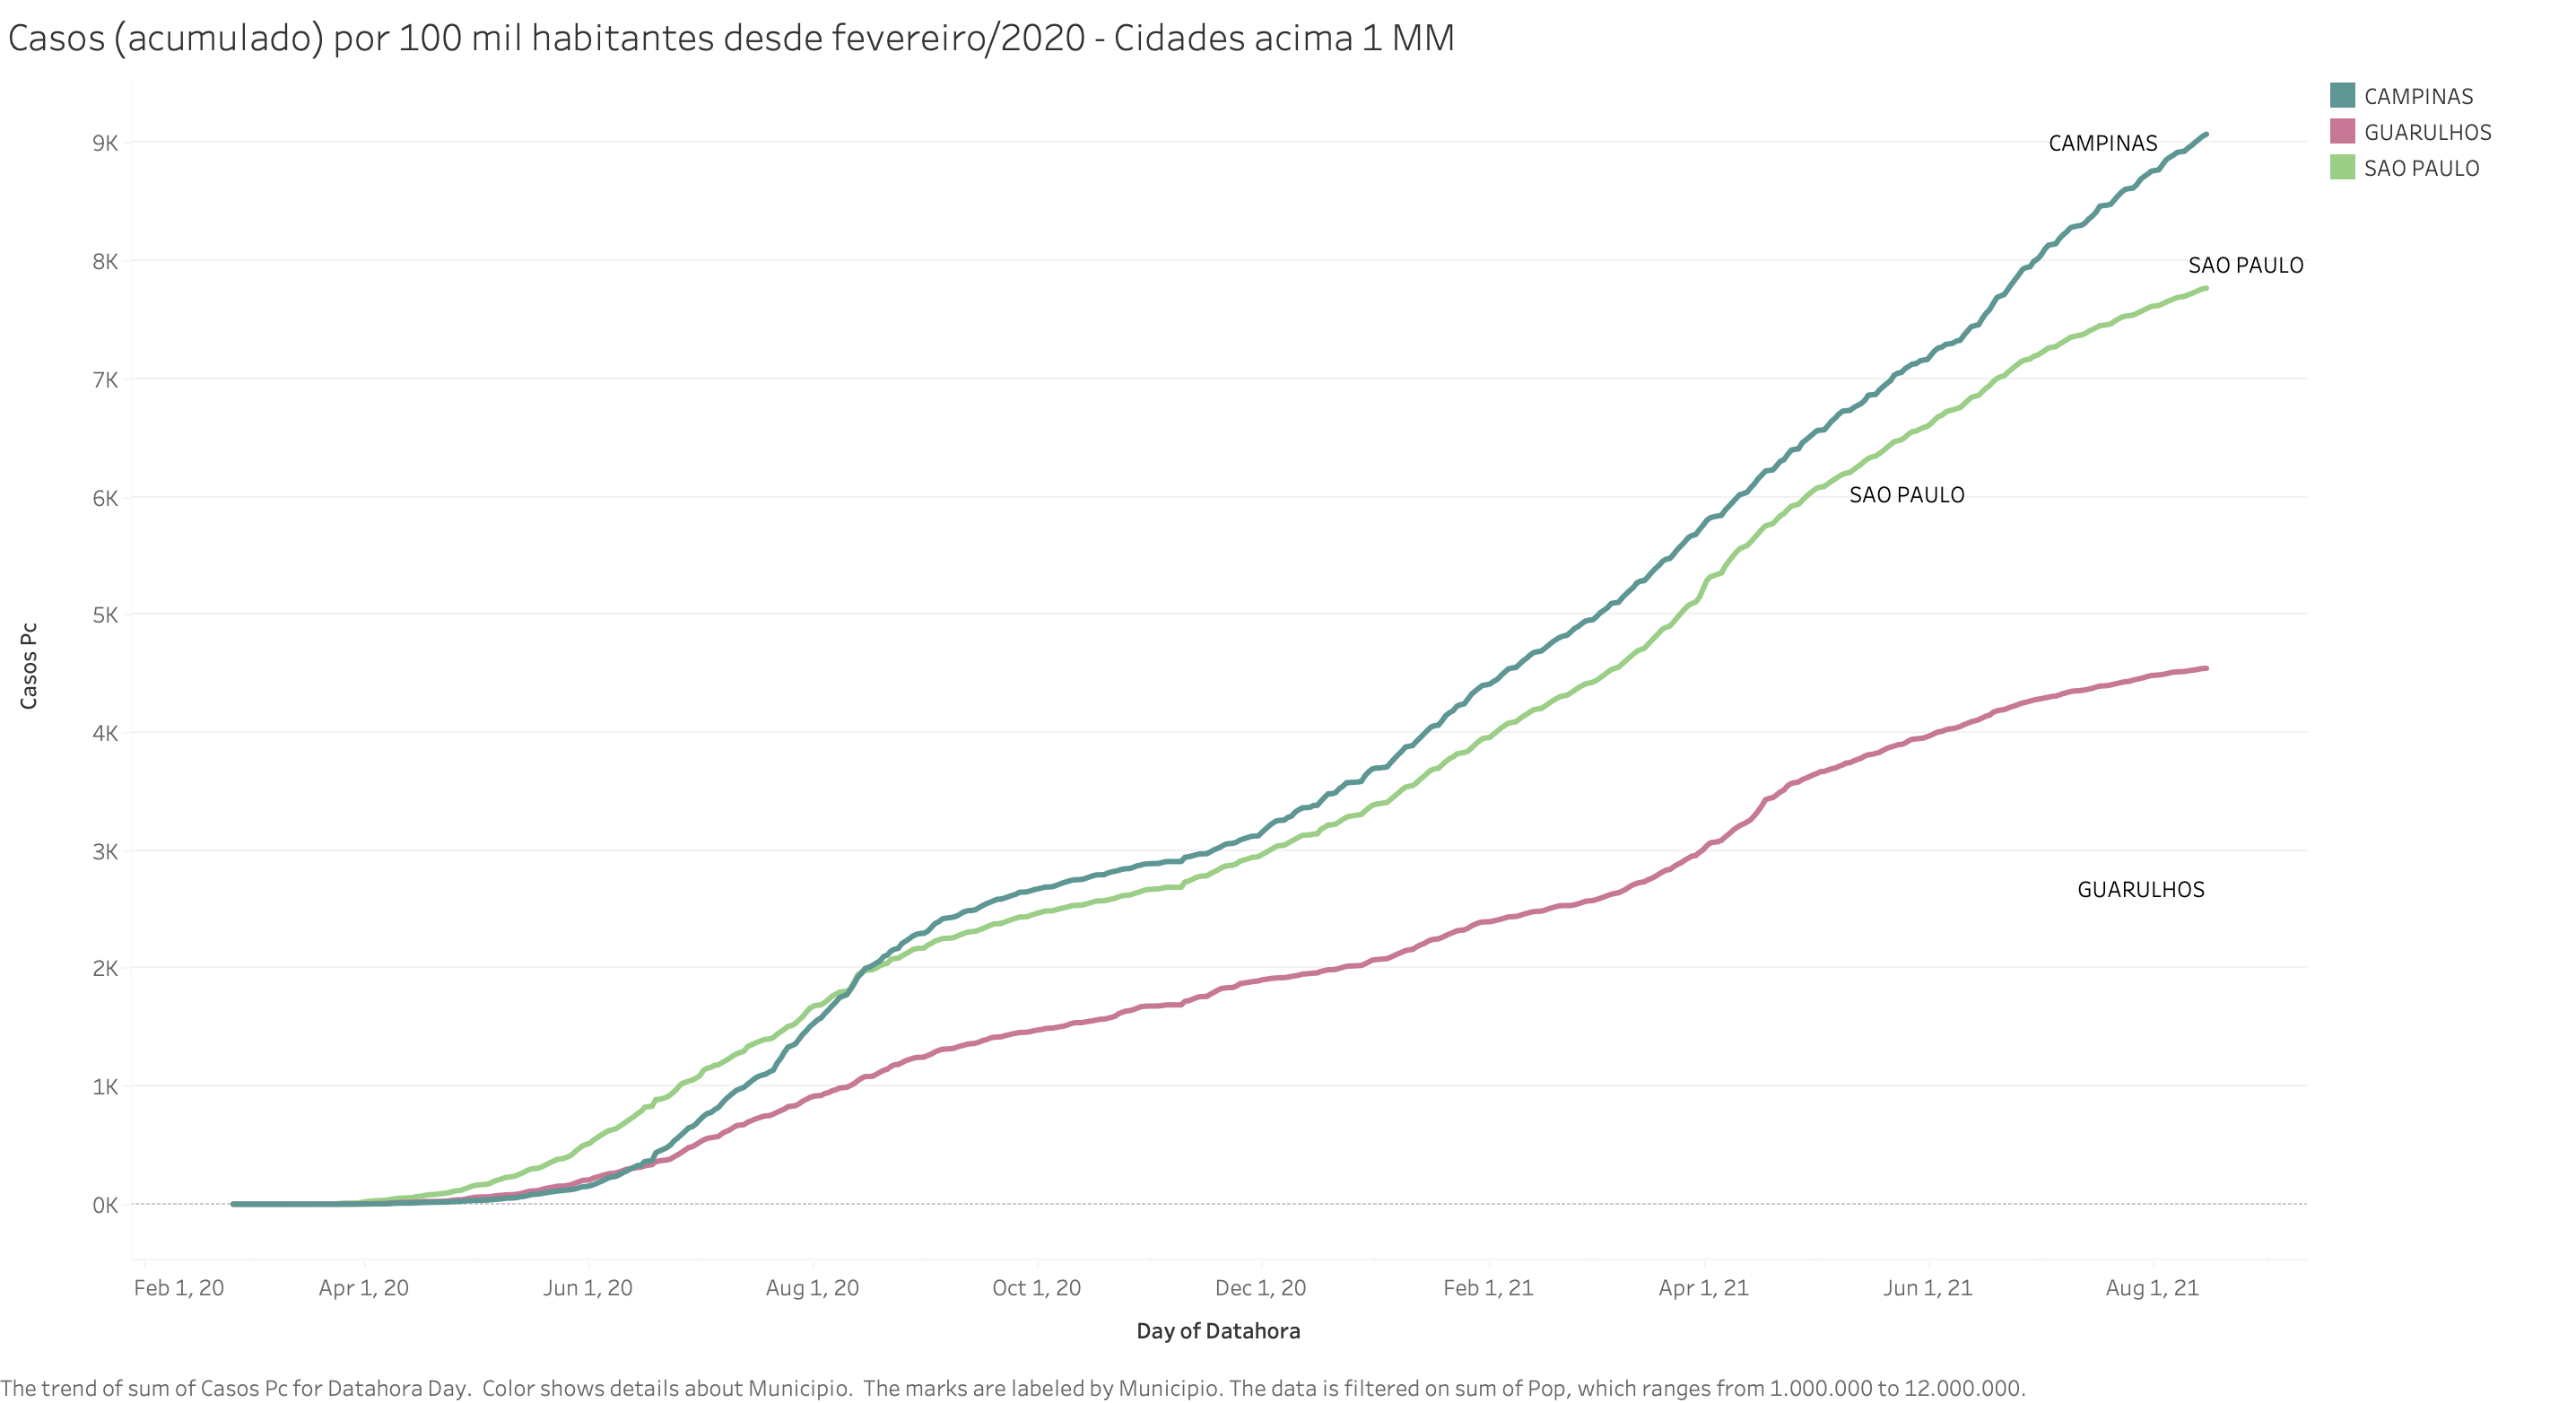

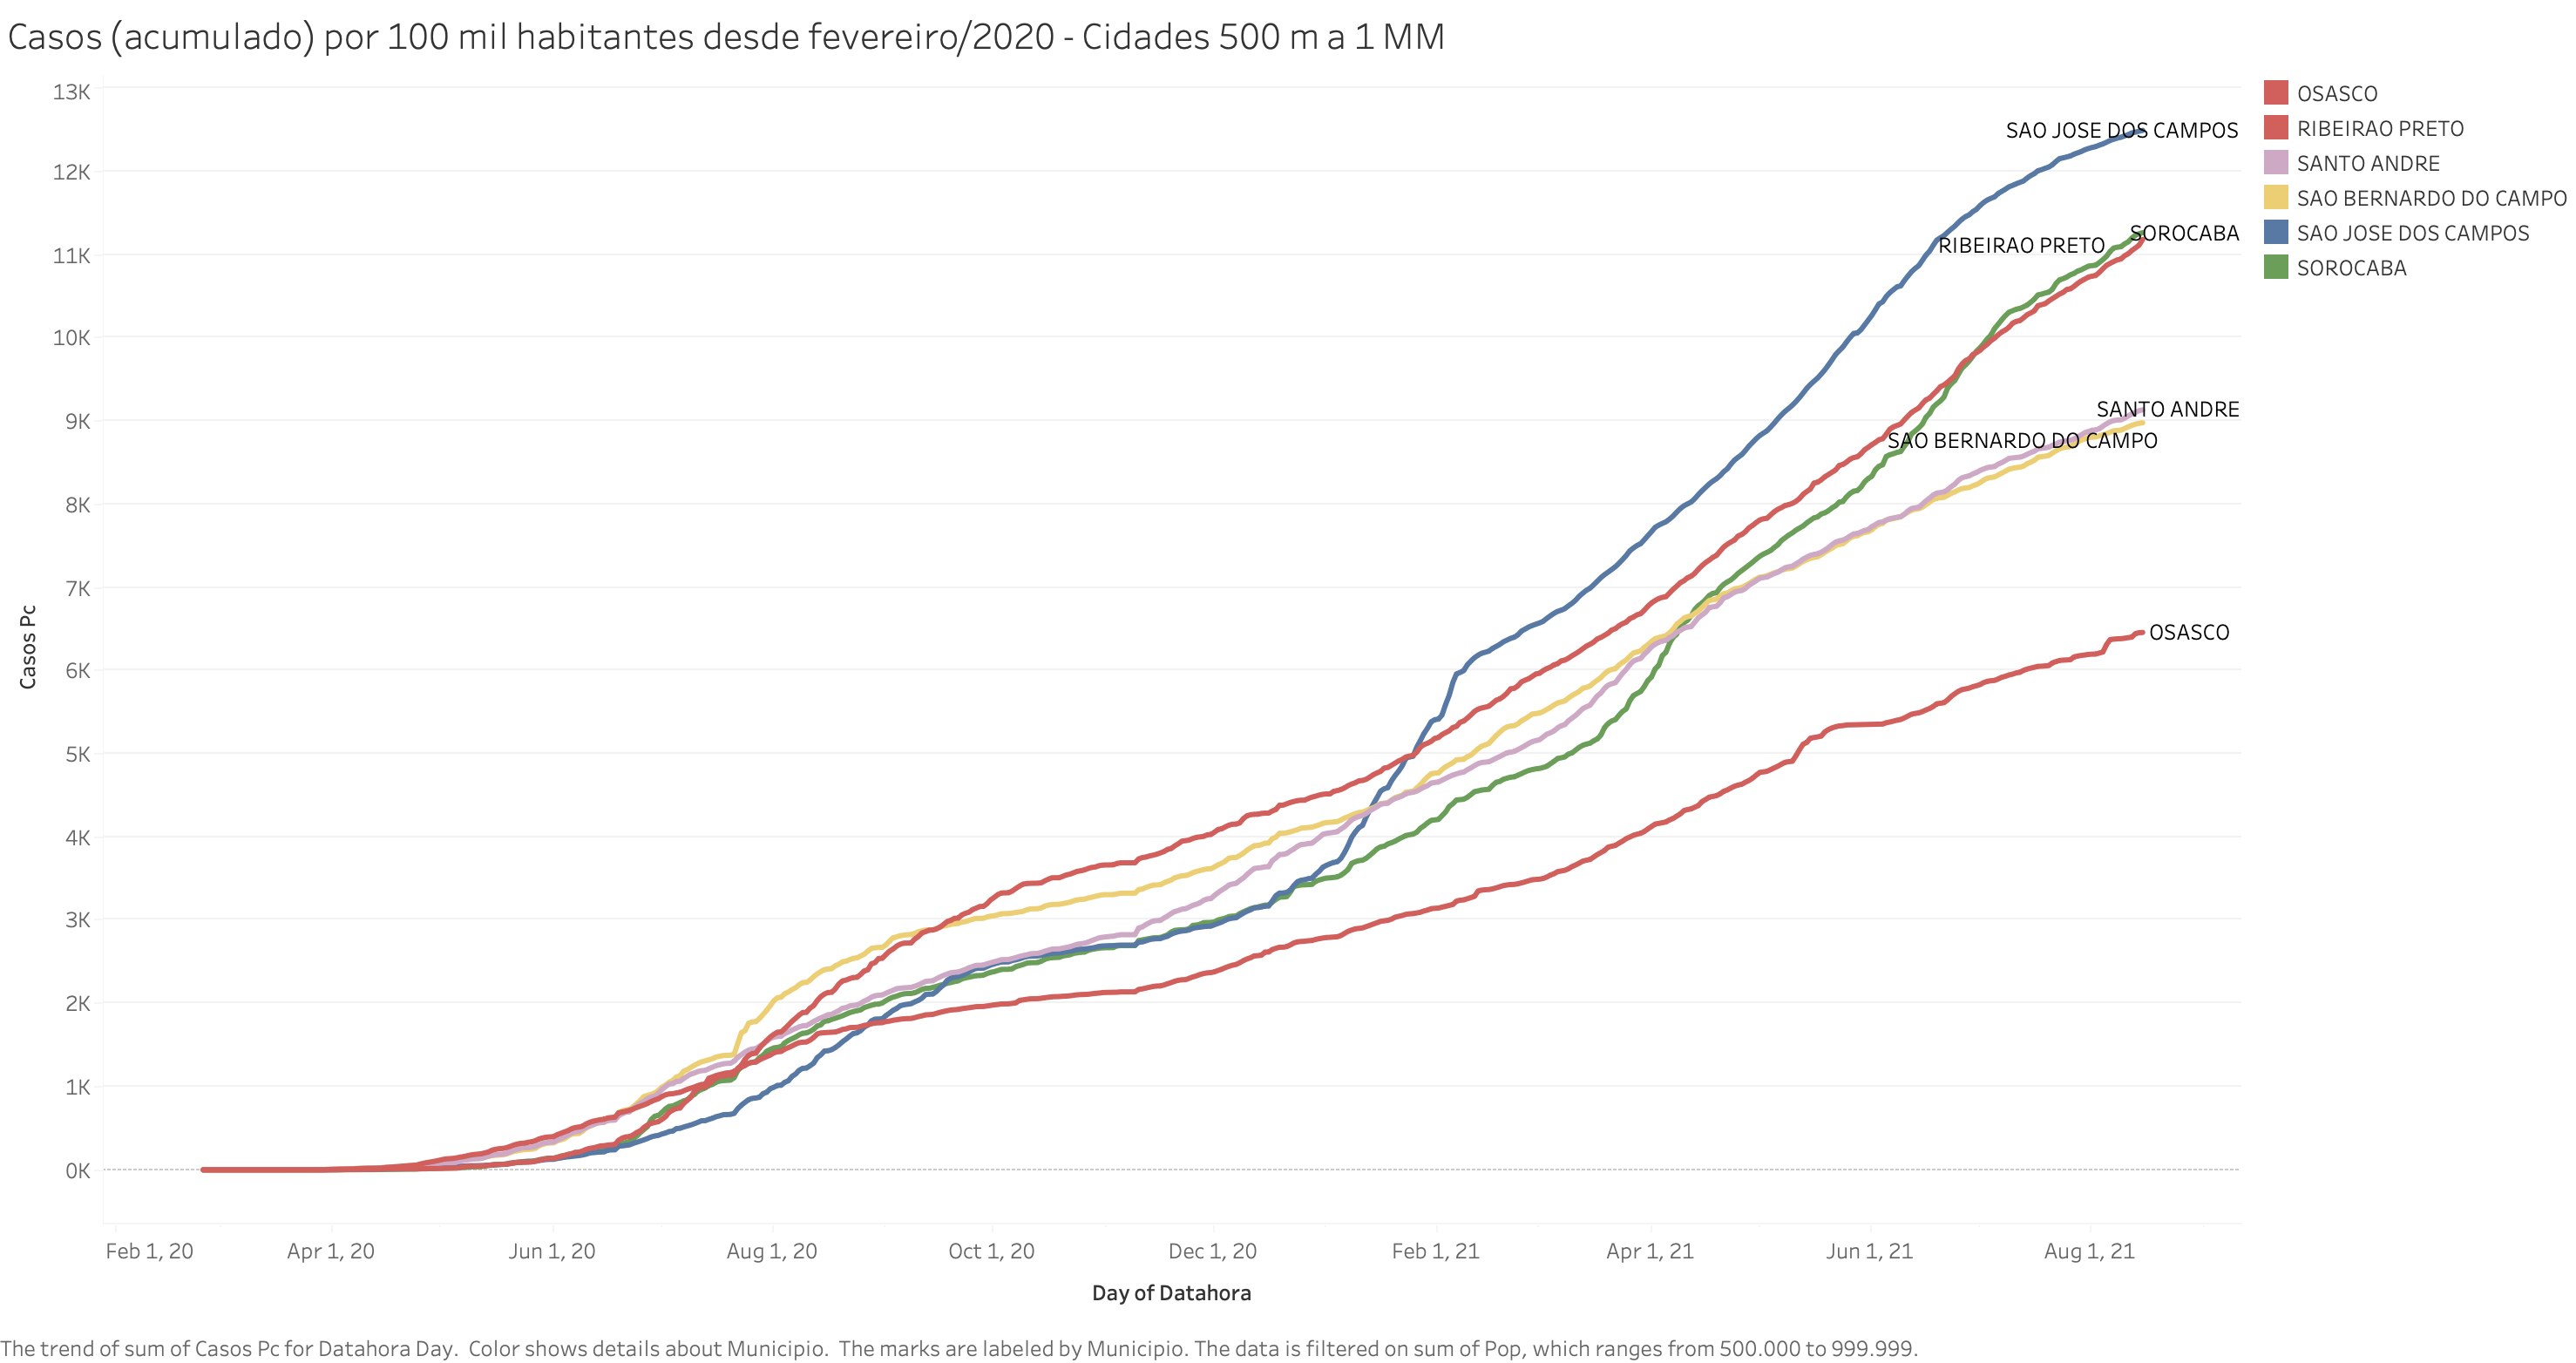

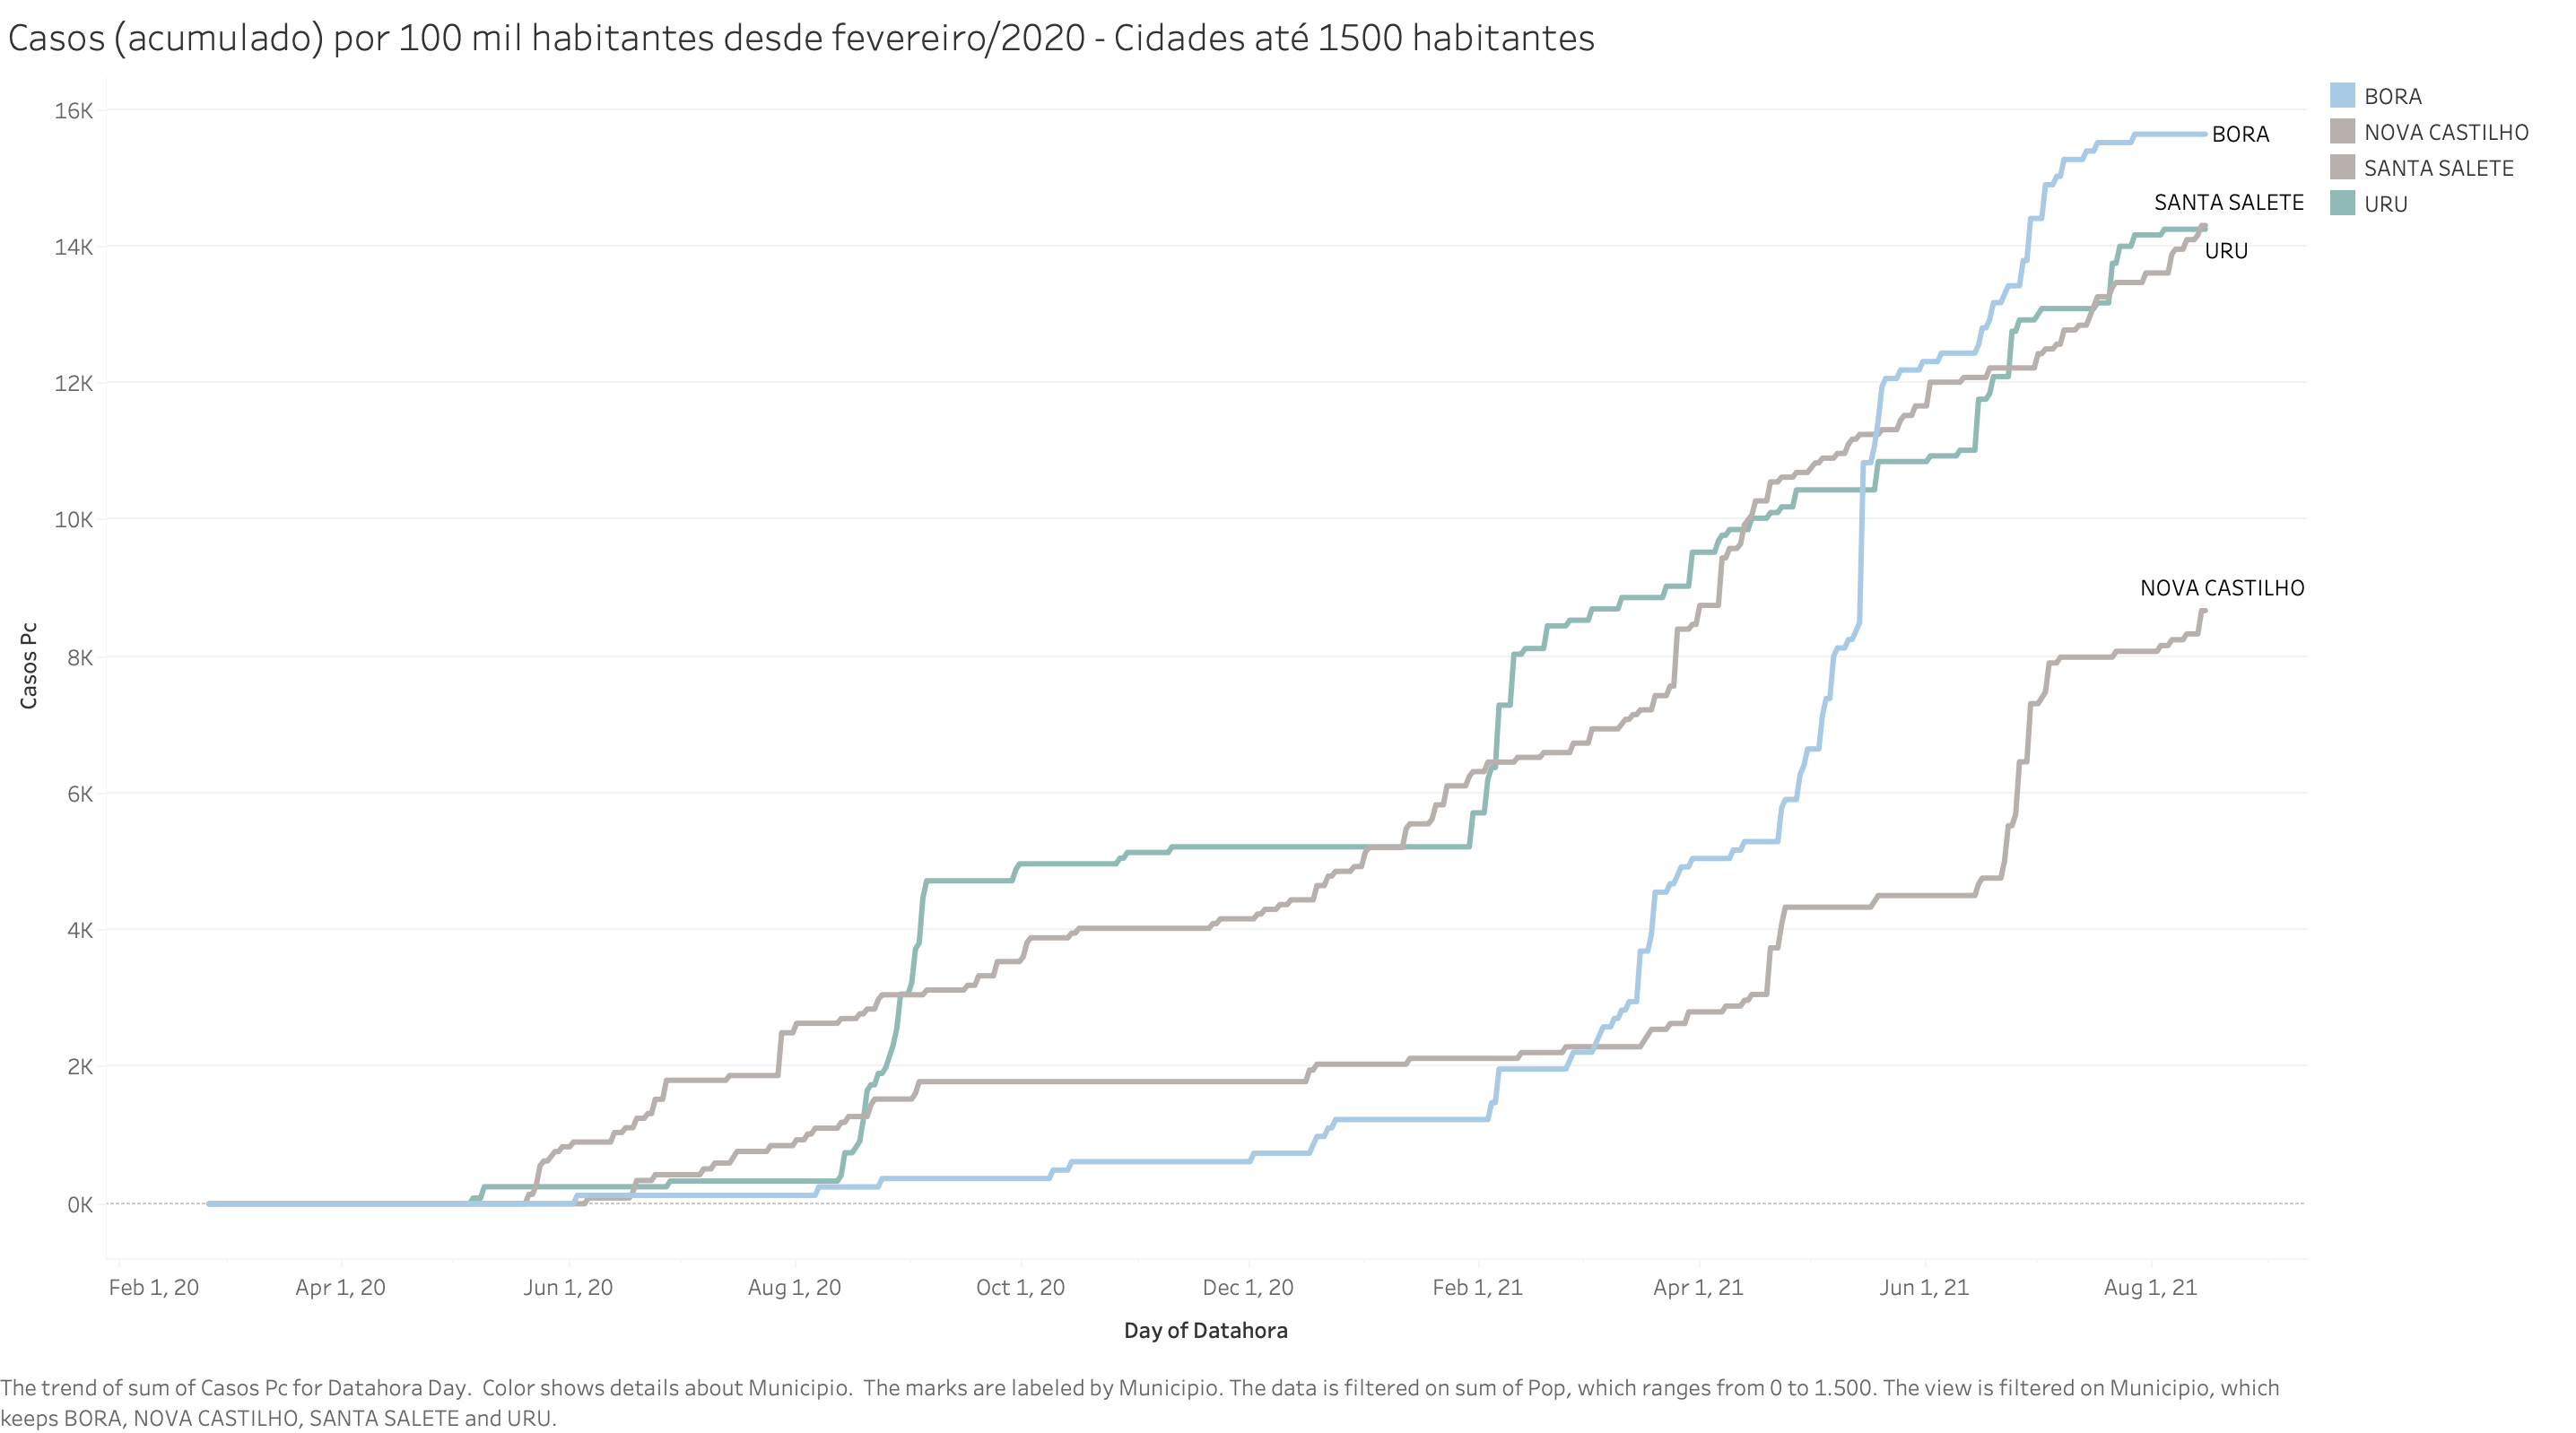

A correlação abaixo entre casos e óbitos destaca os municípios que tiveram mais sucesso no tratamento da doença (cidades abaixo da diagonal), e aqueles onde houve mais evolução para óbito (acima da diagonal).

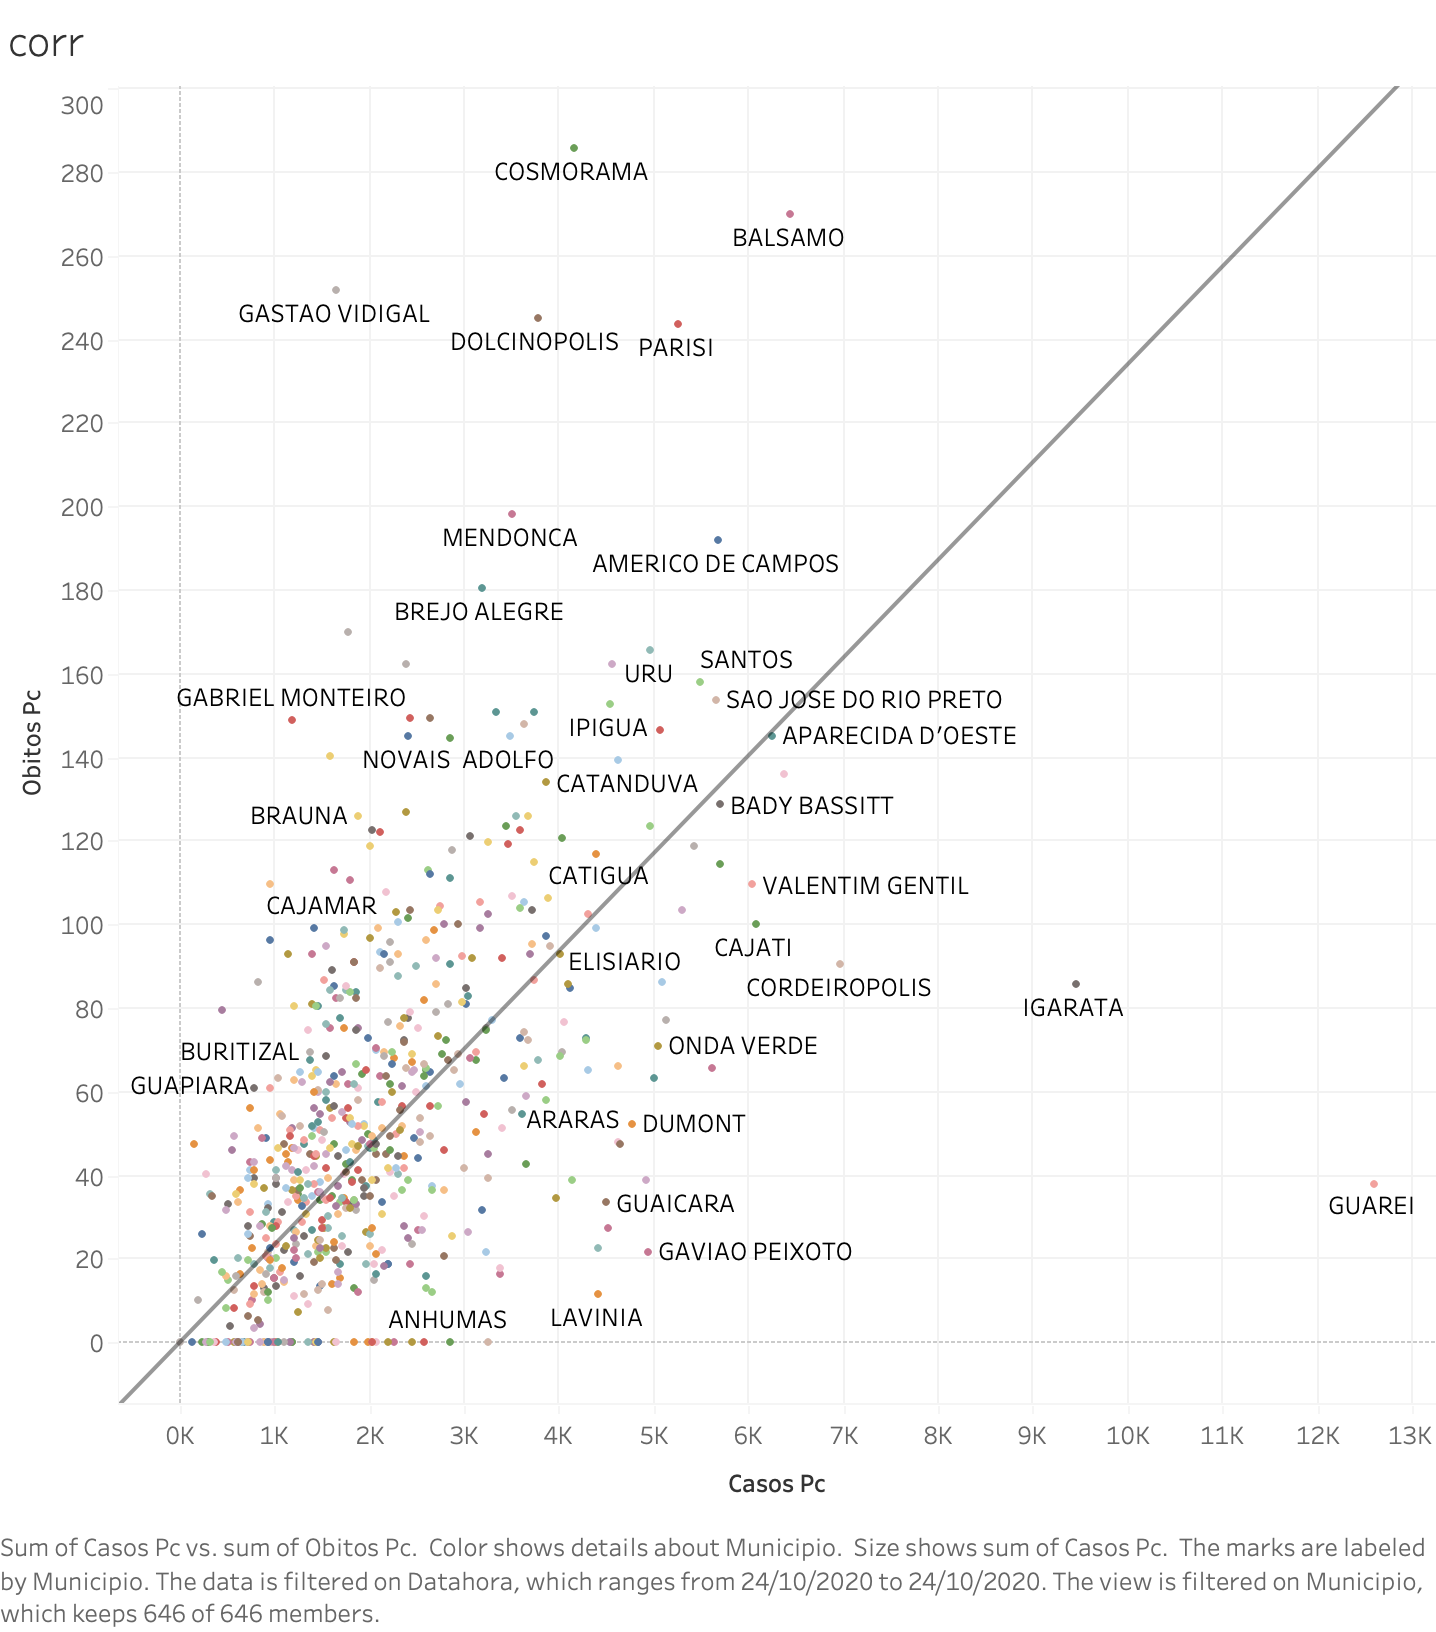

Finalmente o mapa abaixo mostra a distribuição geográfica dos casos no estado de São Paulo, fixando a data do final de 2020. Como esperado, acompanha a distribuição populacional dos municípios.

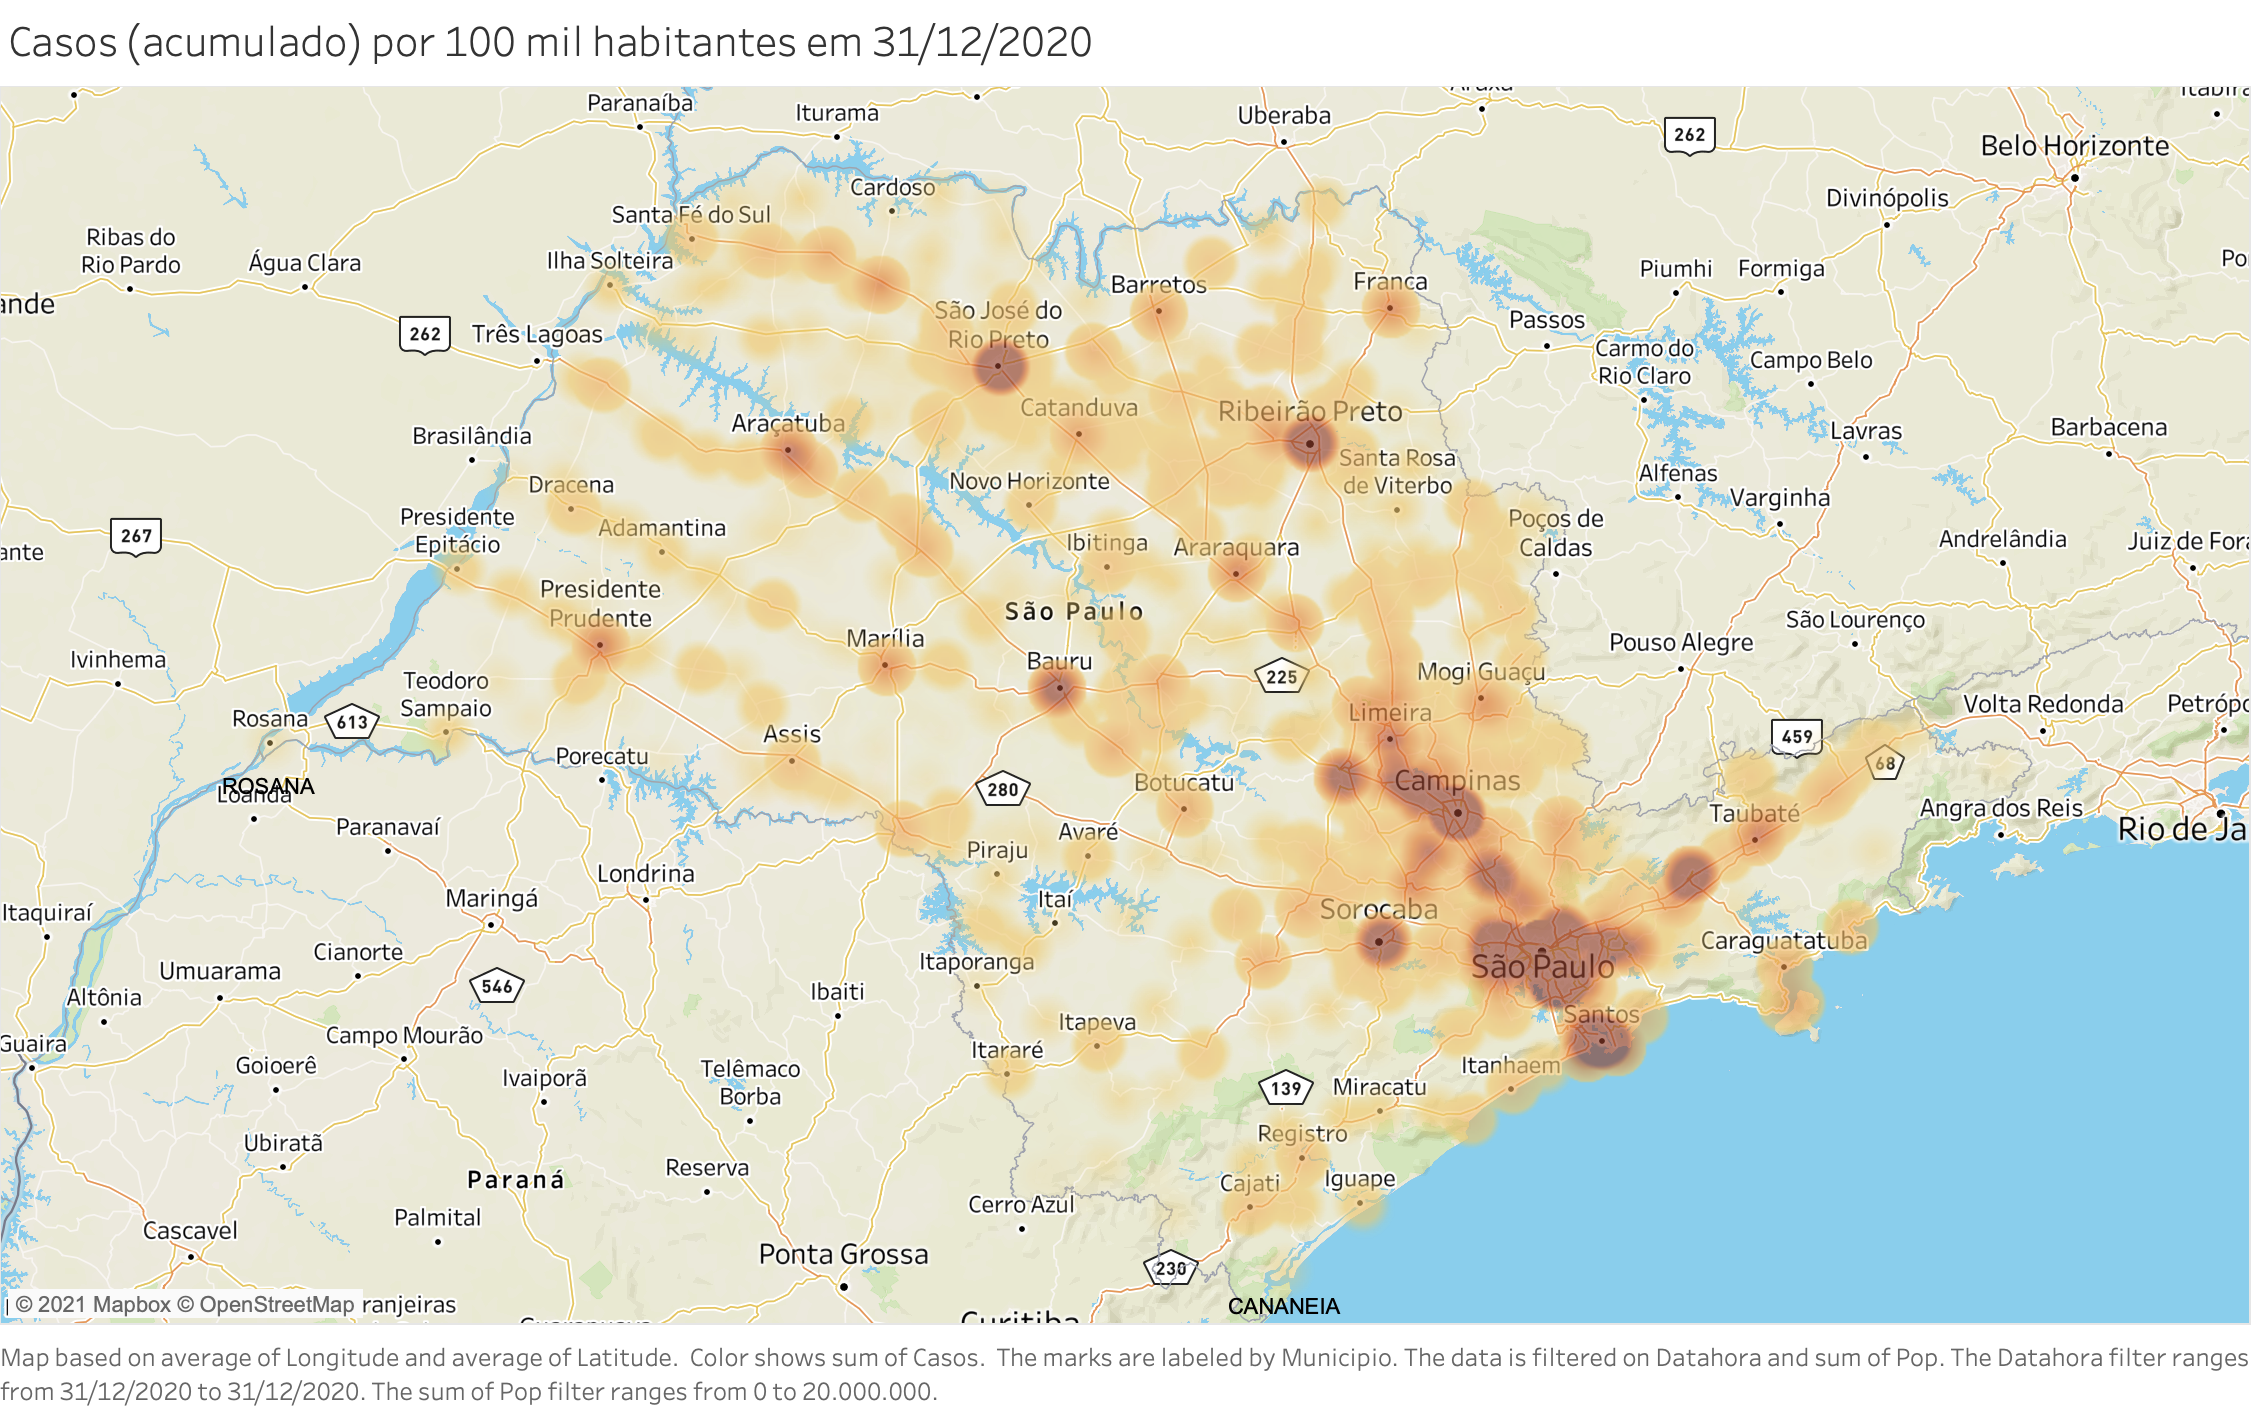

Voltando à base gravada em excel - poderíamos amarrá-la com a base de mobilidade utilizada em ANALISE 001 ??? Vamos tentar. 

Os dados que queremos amarrar estão no arquivo dados_sp.xlsx. A planilha acima foi renomeada para dados_covid_sp_150821_mob.xlsx, algumas colunas foram retiradas e colunas de municipio e data renomeadas para baterem com as da outra planilha.

In [9]:
dados_covid_sp = pd.read_excel('dados_covid_sp_150821_mob.xlsx')
dados_covid_sp

municipio       data  casos  casos_novos  casos_pc  obitos  \
0       AGUAS DA PRATA 2020-02-25      0            0     0.000       0   
1       AGUAS DA PRATA 2020-02-26      0            0     0.000       0   
2       AGUAS DA PRATA 2020-02-27      0            0     0.000       0   
3       AGUAS DA PRATA 2020-02-28      0            0     0.000       0   
4       AGUAS DA PRATA 2020-02-29      0            0     0.000       0   
...                ...        ...    ...          ...       ...     ...   
347543        ZACARIAS 2021-08-11    246            0  9609.375      10   
347544        ZACARIAS 2021-08-12    246            0  9609.375      10   
347545        ZACARIAS 2021-08-13    248            2  9687.500      10   
347546        ZACARIAS 2021-08-14    248            0  9687.500      10   
347547        ZACARIAS 2021-08-15    248            0  9687.500      10   

        obitos_novos  obitos_pc  letalidade   pop  pop_60  latitude  longitude  
0                  0      0.000    0.000000  7797    1729  -21.9319   -46.7176  
1                  0      0.000    0.000000  7797    1729  -21.9319   -46.7176  
2                  0      0.000    0.000000  7797    1729  -21.9319   -46.7176  
3                  0      0.000    0.000000  7797    1729  -21.9319   -46.7176  
4                  0      0.000    0.000000  7797    1729  -21.9319   -46.7176  
...              ...        ...         ...   ...     ...       ...        ...  
347543             0    390.625    0.040650  2560     481  -21.0506   -50.0552  
347544             0    390.625    0.040650  2560     481  -21.0506   -50.0552  
347545             0    390.625    0.040323  2560     481  -21.0506   -50.0552  
347546             0    390.625    0.040323  2560     481  -21.0506   -50.0552  
347547             0    390.625    0.040323  2560     481  -21.0506   -50.0552  

[347548 rows x 13 columns]

In [10]:
dados_sp = pd.read_excel('dados_sp.xlsx')
dados_sp

Unnamed: 0    municipio        data  med_var_mob  MMS-7-dias
0               0   ADAMANTINA  2021-01-01   -57.596667         NaN
1               1   ADAMANTINA  2021-01-02   -29.903333         NaN
2               2   ADAMANTINA  2021-01-03   -14.288333         NaN
3               3   ADAMANTINA  2021-01-04    -4.856667         NaN
4               4   ADAMANTINA  2021-01-05    -5.340000         NaN
...           ...          ...         ...          ...         ...
68329       68332  VOTUPORANGA  2021-06-22     1.160000   33.857143
68330       68333  VOTUPORANGA  2021-06-23    -0.912500   31.428571
68331       68334  VOTUPORANGA  2021-06-24     2.165000   32.571429
68332       68335  VOTUPORANGA  2021-06-25     5.991667   32.428571
68333       68336  VOTUPORANGA  2021-06-26     5.060000   36.428571

[68334 rows x 5 columns]

In [22]:
dados_sp.data = dados_sp.data.astype('datetime64[ns]')

In [26]:
dados_covid_sp.data = dados_covid_sp.data.astype('datetime64[ns]')

In [27]:
dados_mob_casos_sp = pd.merge(dados_covid_sp, dados_sp, on=["municipio","data"], how="inner")

In [28]:
dados_mob_casos_sp

municipio       data  casos  casos_novos      casos_pc  obitos  \
0      AGUAS DA PRATA 2021-01-01    105            1   1346.671797       5   
1      AGUAS DA PRATA 2021-01-02    105            0   1346.671797       5   
2      AGUAS DA PRATA 2021-01-03    105            0   1346.671797       5   
3      AGUAS DA PRATA 2021-01-04    106            1   1359.497243       5   
4      AGUAS DA PRATA 2021-01-05    109            3   1397.973580       5   
...               ...        ...    ...          ...           ...     ...   
68329     VOTUPORANGA 2021-06-22  12533          104  13658.456844     379   
68330     VOTUPORANGA 2021-06-23  12627           94  13760.897995     379   
68331     VOTUPORANGA 2021-06-24  12705           78  13845.902354     382   
68332     VOTUPORANGA 2021-06-25  12796           91  13945.074106     385   
68333     VOTUPORANGA 2021-06-26  12853           57  14007.192677     386   

       obitos_novos   obitos_pc  letalidade    pop  pop_60  latitude  \
0                 0   64.127228    0.047619   7797    1729  -21.9319   
1                 0   64.127228    0.047619   7797    1729  -21.9319   
2                 0   64.127228    0.047619   7797    1729  -21.9319   
3                 0   64.127228    0.047170   7797    1729  -21.9319   
4                 0   64.127228    0.045872   7797    1729  -21.9319   
...             ...         ...         ...    ...     ...       ...   
68329             9  413.034002    0.030240  91760   17203  -20.4237   
68330             0  413.034002    0.030015  91760   17203  -20.4237   
68331             3  416.303400    0.030067  91760   17203  -20.4237   
68332             3  419.572799    0.030088  91760   17203  -20.4237   
68333             1  420.662598    0.030032  91760   17203  -20.4237   

       longitude  Unnamed: 0  med_var_mob  MMS-7-dias  
0       -46.7176         354   -39.693333   16.714286  
1       -46.7176         355    -2.308333   12.571429  
2       -46.7176         356   -19.378333    9.428571  
3       -46.7176         357   -11.065000    6.000000  
4       -46.7176         358   -14.546667    6.285714  
...          ...         ...          ...         ...  
68329   -49.9781       68332     1.160000   33.857143  
68330   -49.9781       68333    -0.912500   31.428571  
68331   -49.9781       68334     2.165000   32.571429  
68332   -49.9781       68335     5.991667   32.428571  
68333   -49.9781       68336     5.060000   36.428571  

[68334 rows x 16 columns]

Lembrando que agora esta massa de dados está restrita ao primeiro semestre de 2021. Voltemos ao Tableau.

In [30]:
dados_mob_casos_sp.to_excel("dados_mob_casos_sp.xlsx")